# <font color = 'orange'> Chest Cancer Classification

---

## <font color='blue'> Downloading and extracting zip file from google drive

In [1]:
import zipfile
import gdown

dataset_url = "https://drive.google.com/file/d/1z0mreUtRmR-P-magILsDR3T7M6IkGXtY/view?usp=sharing"
prefix = 'https://drive.google.com/uc?/export=download&id='
file_id = dataset_url.split("/")[-2]
download_url = prefix + file_id
gdown.download(download_url, "data.zip")

with zipfile.ZipFile("data.zip", 'r') as zip_ref:
    zip_ref.extractall()

Downloading...
From (original): https://drive.google.com/uc?/export=download&id=1z0mreUtRmR-P-magILsDR3T7M6IkGXtY
From (redirected): https://drive.google.com/uc?%2Fexport=download&id=1z0mreUtRmR-P-magILsDR3T7M6IkGXtY&confirm=t&uuid=707cc54f-f342-4110-ba87-dd8dde99105c
To: /content/data.zip
100%|██████████| 49.0M/49.0M [00:00<00:00, 143MB/s]


---

/content/Chest-CT-Scan-data/normal/16 - Copy - Copy.png


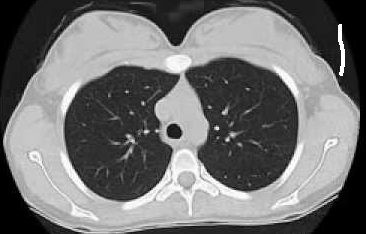

/content/Chest-CT-Scan-data/adenocarcinoma/000041 (4).png


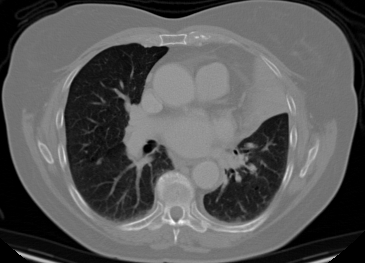

-------------------------------
/content/Chest-CT-Scan-data/normal/21 - Copy (2).png


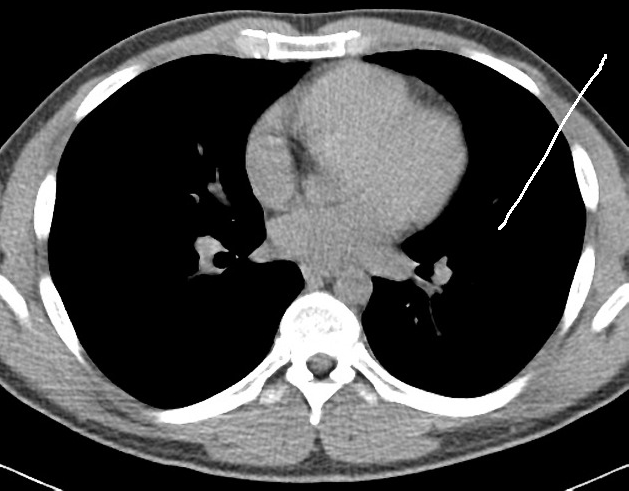

/content/Chest-CT-Scan-data/adenocarcinoma/000118 (6).png


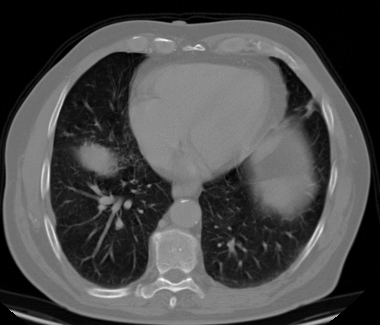

-------------------------------


In [13]:
# Visualizing data
import os
from IPython.display import display, Image

folder = ''

normal_images = ["/content/Chest-CT-Scan-data/normal/"+f for f in os.listdir('/content/Chest-CT-Scan-data/normal')]
adinocarsinoma_images = ["/content/Chest-CT-Scan-data/adenocarcinoma/"+f for f in os.listdir('/content/Chest-CT-Scan-data/adenocarcinoma')]

for i in range(2):
    print(normal_images[i])
    display(Image(filename=normal_images[i], width=240, height=240))
    print(adinocarsinoma_images[i])
    display(Image(filename=adinocarsinoma_images[i], width=240, height=240))
    print('-------------------------------')

---

## <font color='blue'> Model Building

In [3]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16, preprocess_input

In [4]:
# get pretrained vgg-16 model

IMAGE_SIZE = (224, 224)

conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=IMAGE_SIZE + (3,)
)

conv_base.trainable = False

In [5]:
# create custom model

model = Sequential()

model.add(conv_base)
model.add(Flatten())   # input layer for dense layers
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 21137729 (80.63 MB)
Trainable params: 6423041 (24.50 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

---

## <font color='blue'> Model Training

In [7]:
# Data Augmentation and Data Generator

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')


train_generator = train_datagen.flow_from_directory(
        '/content/Chest-CT-Scan-data',
        target_size=IMAGE_SIZE,
        batch_size=32,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        '/content/Chest-CT-Scan-data',
        target_size=IMAGE_SIZE,
        batch_size=32,
        class_mode='binary')

Found 343 images belonging to 2 classes.
Found 343 images belonging to 2 classes.


In [8]:
from keras.callbacks import ModelCheckpoint

history = model.fit_generator(
        train_generator,
        epochs=10,
        validation_data=validation_generator,
        callbacks = [ModelCheckpoint(filepath='mymodel.h5', verbose=2, save_best_only=True)]
        )

<ipython-input-8-5d1fb10d162b>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/10
11/11 [==============================] - ETA: 0s - loss: 32.2976 - accuracy: 0.6006 
Epoch 1: val_loss improved from inf to 1.34604, saving model to mymodel.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 404s 36s/step - loss: 32.2976 - accuracy: 0.6006 - val_loss: 1.3460 - val_accuracy: 0.8309
Epoch 2/10
11/11 [==============================] - ETA: 0s - loss: 1.3891 - accuracy: 0.8513 
Epoch 2: val_loss did not improve from 1.34604
11/11 [==============================] - 372s 35s/step - loss: 1.3891 - accuracy: 0.8513 - val_loss: 1.5645 - val_accuracy: 0.8746
Epoch 3/10
11/11 [==============================] - ETA: 0s - loss: 0.6183 - accuracy: 0.9388 
Epoch 3: val_loss improved from 1.34604 to 0.27873, saving model to mymodel.h5
11/11 [==============================] - 372s 35s/step - loss: 0.6183 - accuracy: 0.9388 - val_loss: 0.2787 - val_accuracy: 0.9359
Epoch 4/10
11/11 [==============================] - ETA: 0s - loss: 0.1770 - accuracy: 0.9417 
Epoch 4: val_loss improved from 0.27873 to 0.13157, saving model to mymodel.h5
11/11 [==============================] - 374s 36s/step - loss: 0.1770 - accuracy: 0.9417 - val_loss: 0.1316 - val_ac

---

## <font color='blue'> Plotting accuracy and loss

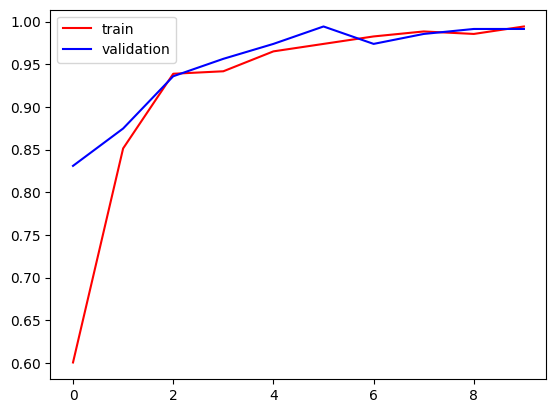

In [10]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

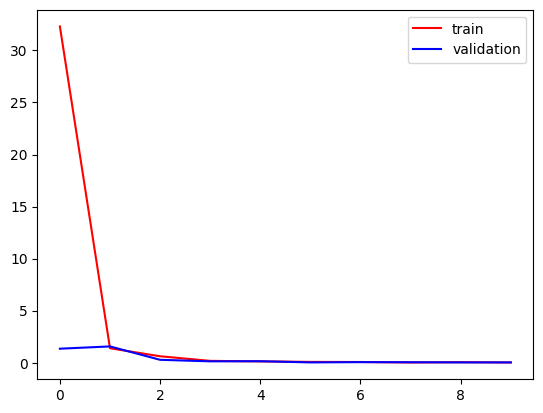

In [11]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

---

## <font color='blue'> Prediction

In [41]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np

model = load_model("mymodel.h5")

test_image = image.load_img(normal_images[5], target_size =IMAGE_SIZE)
# test_image = image.load_img(adinocarsinoma_images[0], target_size =IMAGE_SIZE)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
pred = model.predict(test_image)
result = round(pred[0][0])
if result == 1:
    prediction = 'Normal'
else:
    prediction = 'Adenocarcinoma Cancer'
print()
print(prediction)

1/1 [==============================] - 2s 2s/step

Normal


---